<a href="https://colab.research.google.com/github/louaysboui/IA-_detection-and-datasets-/blob/main/Haar_Cascade_Object_Detection_Face_%26_Eye_OpenCV_Python_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## detectMultiScale

La fonction detectMultiScale() est utilisée dans OpenCV pour détecter des objets dans une image, comme des visages ou des yeux. Elle est souvent utilisée avec des classificateurs Haar Cascade pour identifier et localiser des objets spécifiques dans une image. Cette fonction renvoie les positions des objets détectés sous forme de rectangles (coordonnées x, y et dimensions).

Parameters
- image : L'image dans laquelle on cherche à détecter des objets. Cette image est généralement convertie en niveaux de gris avant d'être utilisée dans cette fonction.

- scaleFactor : Ce paramètre spécifie dans quelle mesure la taille de l'image est réduite à chaque échelle de la détection. Un scaleFactor de 1.1 signifie que l'image est réduite de 10% à chaque passage. Des valeurs plus petites permettent de détecter des objets plus proches de leur taille réelle, mais cela augmente le temps de calcul.

- minNeighbors : Ce paramètre indique combien de rectangles voisins doivent être détectés pour qu'un objet soit considéré comme valide. Plus cette valeur est élevée, plus la détection est stricte (moins de faux positifs).

- flags (optionnel) : Ce paramètre est généralement mis à 0. Il est utilisé pour ajuster les paramètres internes de la détection dans des cas spécifiques (moins courant).

- minSize (optionnel) : Taille minimale de l'objet à détecter. Si un objet est plus petit que cette taille, il ne sera pas détecté. Cela permet d'ignorer les petits objets bruyants.

- maxSize (optionnel) : Taille maximale de l'objet à détecter. Si un objet est plus grand que cette taille, il ne sera pas détecté.

- vous devez télécharger "haarcascade_eye.xml" et "haarcascade_frontalface_default.xml"

In [2]:
from google.colab.patches import cv2_imshow

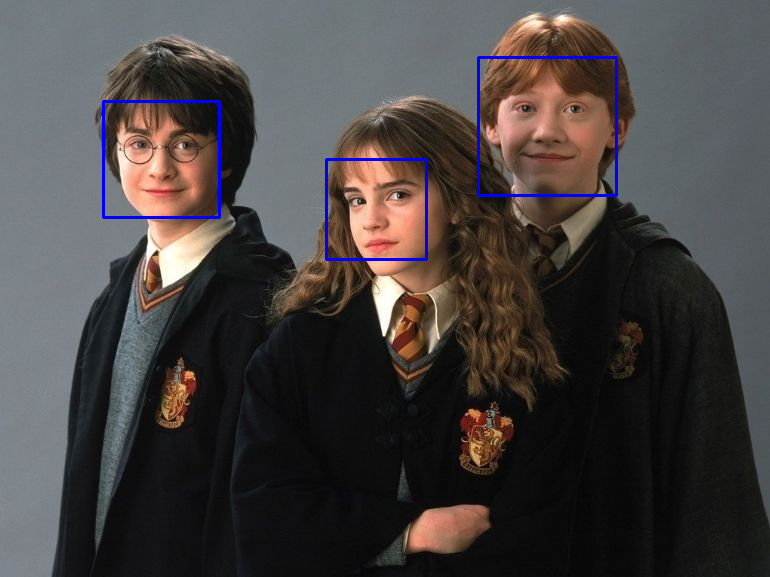

In [3]:
import cv2
from google.colab.patches import cv2_imshow # Import cv2_imshow

# Charger le classificateur Haar pour la détection de visages
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + '/haarcascade_frontalface_default.xml')

# Lire l'image
image = cv2.imread('/harry.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Détecter les visages
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Dessiner des rectangles autour des visages détectés
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Afficher l'image avec les visages détectés
cv2_imshow(image) # Use cv2_imshow instead of cv2.imshow

# Remove the following lines as they are not needed with cv2_imshow
# cv2.waitKey(0)
# cv2.destroyAllWindows()

For example, here we download and display a PNG image of the Colab logo:

 ### Haar Cascade  pour détecter les visages et les yeux en temps réel à partir de la webcam

## 1 Importation des Bibliothèques et Chargement des classificateurs Haar pour la détection de visages et d'yeux

- CascadeClassifier : OpenCV utilise des fichiers XML préentraînés (ici, les fichiers Haar Cascade) pour détecter des visages et des yeux dans une image.
- Les fichiers haarcascade_frontalface_default.xml et haarcascade_eye.xml contiennent les caractéristiques nécessaires pour identifier les visages et les yeux.

In [4]:
import numpy as np
import cv2

# multiple cascades: https://github.com/Itseez/opencv/tree/master/data/haarcascades

#https://github.com/Itseez/opencv/blob/master/data/haarcascades/haarcascade_frontalface_default.xml
face_cascade = cv2.CascadeClassifier('/haarcascade_frontalface_default.xml')
#https://github.com/Itseez/opencv/blob/master/data/haarcascades/haarcascade_eye.xml
eye_cascade = cv2.CascadeClassifier('/haarcascade_eye.xml')

## 2. Capture de la vidéo depuis la webcam
cv2.VideoCapture(0) : Capture vidéo à partir de la webcam. L'index 0 fait référence à la webcam par défaut.

In [ ]:
cap = cv2.VideoCapture(0)

## 3. Boucle pour lire les images vidéo et détecter les visages et yeux

- cap.read() : Capture chaque frame de la vidéo en temps réel.
- cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) : Convertit l'image de couleur en niveaux de gris, car la détection de Haar fonctionne mieux sur des images en niveaux de gris.
- face_cascade.detectMultiScale() : Détecte les visages dans l'image. Les paramètres :
    * 1.3 : Facteur d'échelle, qui réduit la taille de l'image à chaque itération pour mieux détecter les objets.
    * 5 : Le nombre minimal de rectangles voisins pour que la détection soit validée.
- Dessiner des rectangles autour des visages et détecter les yeux
- Boucle sur les visages détectés : Pour chaque visage détecté, un rectangle est dessiné autour avec cv2.rectangle().
    * (x, y, w, h) : Coordonnées et dimensions du visage détecté.
    * roi_gray : Détecte les yeux uniquement dans la région du visage en niveaux de gris.
    * eye_cascade.detectMultiScale() : Applique un classificateur Haar pour détecter les yeux dans la région du visage (ROI : Region Of Interest). Un rectangle vert est ensuite dessiné autour de chaque œil.

In [5]:
while 1:
    ret, img = cap.read()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]

        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

    cv2.imshow('img',img)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()


Error opening video stream or file
Can't receive frame (stream end?). Exiting ...


error: OpenCV(4.10.0) /io/opencv/modules/highgui/src/window.cpp:1295: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'
